# Course: IT Applications to Banking and Finance 

**- Name: Nguyễn Lại Công Minh - Student ID: 2212345026 - ClassCode: ML53**

# About the project

This project explores two machine learning approaches for predicting obesity levels: Random Forest Classifiers (RFC) and Neural Networks (NNs). It utilizes a dataset containing health and lifestyle factors such as BMI, physical activity, calorie intake, and demographic attributes to classify individuals into seven obesity categories (e.g., Normal Weight, Obesity Type I, II, III). Through feature engineering and hyperparameter tuning, both models are trained and evaluated using metrics like accuracy, F1-score, and AUC-ROC. By comparing RFC and NNs, this study highlights the strengths of different machine learning techniques in predicting obesity and provides insights into their applicability for health risk assessment.

# Random Forest Classification

In [14]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import numpy as np
import pandas as pd
from lime import lime_tabular
import shap
import os

from sklearn.utils import shuffle, class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

random_state = 6
np.random.seed(random_state)

## Import data

In [15]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive - ftu.edu.vn\Desktop\Github\AI-assignment-prj\Obesity prediction.csv")

This code processes a dataset df by rounding numerical values and encoding categorical variables into numerical representations using Label Encoding. This preprocessing step is useful for machine learning models that require numerical input, particularly for obesity prediction.

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = df.round(1)
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns to integer numerical categories using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]).astype(int)  # Ensure integer type
    label_encoders[col] = le

# output_file_path = r"C:\Users\Lenovo\OneDrive - ftu.edu.vn\Desktop\Github\AI-assignment-prj\Obesity prediction numerical.csv"
# df.to_csv(output_file_path, index=False)


In [4]:
df 

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.6,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.5,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.8,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.8,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.8,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21.0,1.7,131.4,1,1,3.0,3.0,2,0,1.7,0,1.7,0.9,2,3,4
2107,0,22.0,1.7,133.7,1,1,3.0,3.0,2,0,2.0,0,1.3,0.6,2,3,4
2108,0,22.5,1.8,133.7,1,1,3.0,3.0,2,0,2.1,0,1.4,0.6,2,3,4
2109,0,24.4,1.7,133.3,1,1,3.0,3.0,2,0,2.9,0,1.1,0.6,2,3,4


## Data Cleaning 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   int32  
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   int32  
 5   FAVC            2111 non-null   int32  
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   int32  
 9   SMOKE           2111 non-null   int32  
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   int32  
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   int32  
 15  MTRANS          2111 non-null   int32  
 16  Obesity         2111 non-null   int32  
dtypes: float64(8), int32(9)
memory us

In [18]:
df.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## Outliers Plotting

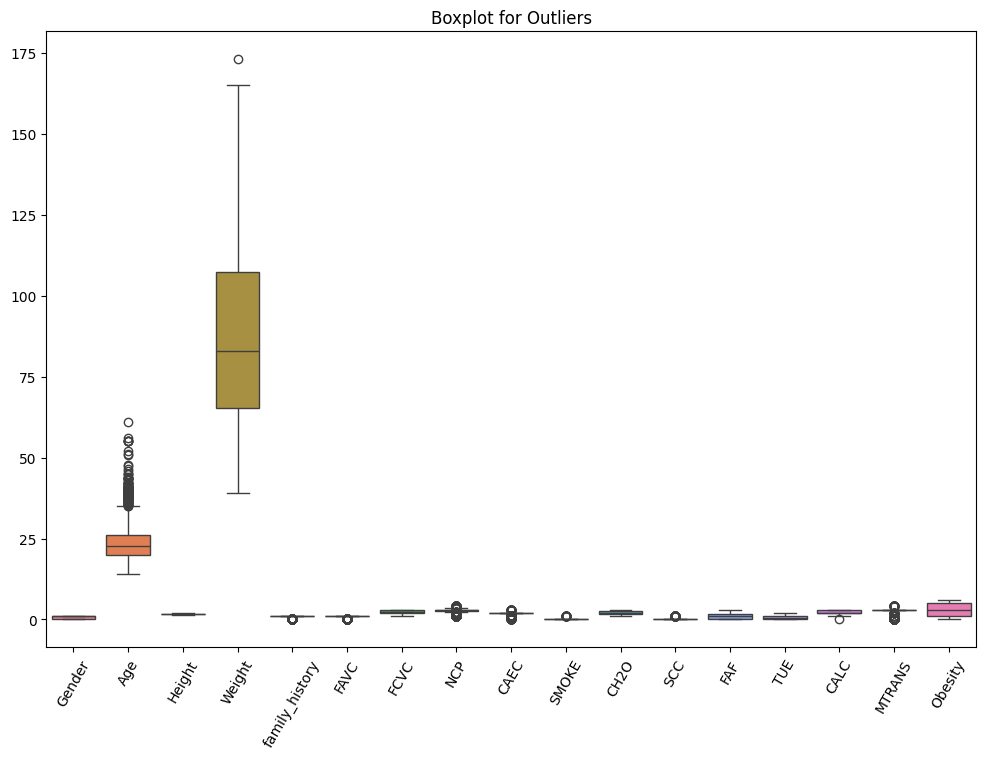

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.title('Boxplot for Outliers')
plt.xticks(rotation=60)

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21c13394160>,
 'caps': [<matplotlib.lines.Line2D at 0x21c133945e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c13394a60>],
 'medians': [<matplotlib.lines.Line2D at 0x21c12f9b2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c12f9bca0>],
 'means': []}

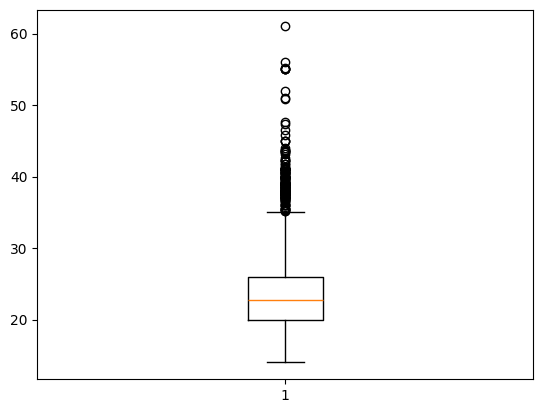

In [22]:
plt.boxplot(df["Age"])

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])

In [24]:
remove_outliers(df,["Age"])
remove_outliers(df,["family_history"])
remove_outliers(df,["FAVC"])
remove_outliers(df,["NCP"])
remove_outliers(df,["SMOKE"])
remove_outliers(df,["MTRANS"])


Age and Weight are the most variable features, with significant outliers. This may indicate a diverse population in terms of age and body weight.
Most other features have limited outliers, suggesting they are more normally distributed or categorical.


## Data Descriptive

In [13]:
df.describe()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
count,2111.000000,2111.00000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.31279,1.701232,86.585978,0.817622,0.883941,2.419138,2.686026,1.859308,0.020843,2.007816,0.045476,1.010279,0.658077,2.268593,2.365230,3.015632
std,0.500083,6.34572,0.099470,26.191165,0.386247,0.320371,0.534181,0.778843,0.468543,0.142893,0.614717,0.208395,0.851329,0.609296,0.515498,1.261423,1.952090
min,0.000000,14.00000,1.400000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.90000,1.600000,65.450000,1.000000,1.000000,2.000000,2.700000,2.000000,0.000000,1.600000,0.000000,0.100000,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.80000,1.700000,83.000000,1.000000,1.000000,2.400000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.600000,2.000000,3.000000,3.000000
75%,1.000000,26.00000,1.800000,107.450000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.500000,0.000000,1.700000,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.00000,2.000000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## Dataset Description and Comments

### 1. Gender (Binary: 0 or 1)
- **Mean:** ~0.51 → Almost equal distribution between two genders.
- **Standard Deviation:** 0.5 → Balanced dataset in terms of gender representation.
- **Min-Max:** 0 to 1 → Binary categorical variable.

### 2. Age
- **Mean:** 24.31 years → Majority of individuals are young adults.
- **Standard Deviation:** 6.35 → Some variability in age.
- **Min-Max:** 14 to 61 years → Covers a broad range from teenagers to older adults.
- **75th Percentile:** 26 years → 75% of individuals are younger than 26.

### 3. Height (meters)
- **Mean:** 1.70m → Close to the average adult height.
- **Standard Deviation:** 0.10 → Reasonable spread.
- **Min-Max:** 1.40m to 2.00m → Realistic human height range.

### 4. Weight (kg)
- **Mean:** 86.59kg → Relatively high.
- **Standard Deviation:** 26.19 → Significant variation.
- **Min-Max:** 39kg to 173kg → Presence of both underweight and severely obese individuals.

### 5. Family History of Obesity (Binary: 0 or 1)
- **Mean:** 0.82 → 82% of individuals have a family history of obesity.
- **Insight:** Suggests a hereditary factor influencing obesity.

### 6. Frequent Consumption of High-Calorie Food (FAVC, Binary)
- **Mean:** 0.88 → 88% of individuals frequently consume high-calorie food.
- **Insight:** May correlate strongly with higher obesity levels.

### 7. Frequency of Consumption of Vegetables (FCVC)
- **Mean:** 2.42 → Moderate vegetable consumption.
- **Scale:** 1 to 3.

### 8. Number of Main Meals Per Day (NCP)
- **Mean:** 2.69 → Most individuals consume around 3 meals per day.
- **Scale:** 1 to 4.

### 9. Consumption of Alcohol (CAEC, Categorical: 0-3)
- **Mean:** 1.86 → Moderate alcohol consumption.
- **Max:** 3 → Some individuals consume alcohol frequently.

### 10. Smoking Habit (SMOKE, Binary)
- **Mean:** 0.02 → Very low proportion of smokers in the dataset.

### 11. Water Consumption (CH2O, Scale 1-3)
- **Mean:** 2.01 → Most individuals drink a moderate amount of water daily.

### 12. Calories Monitoring (SCC, Binary)
- **Mean:** 0.045 → Very few individuals actively monitor their calorie intake.

### 13. Physical Activity Frequency (FAF, Scale 0-3)
- **Mean:** 1.01 → Most individuals engage in low levels of physical activity.
- **Standard Deviation:** 0.85 → Some variation in exercise habits.

### 14. Time Using Electronic Devices (TUE, Scale 0-2)
- **Mean:** 0.66 → Moderate screen time.

### 15. Consumption of Alcohol (CALC, Scale 0-3)
- **Mean:** 2.27 → Majority fall between moderate to high alcohol consumption.

### 16. Mode of Transportation (MTRANS, Scale 0-4)
- **Mean:** 2.37 → Variety of transportation choices.

### 17. Obesity Level (Categorical: 0-6)
- **Mean:** 3.02 → Moderate to high obesity prevalence.
- **Standard Deviation:** 1.95 → Diverse range of obesity levels.
- **Min-Max:** 0 to 6 → Covers underweight to severely obese individuals.

---

#### **Key Insights**
1. **Young adult population** (Mean age ~24 years) with **high obesity prevalence** (Mean obesity level ~3 out of 6).
2. **82% have a family history of obesity** and **88% frequently consume high-calorie foods**.
3. **Moderate vegetable consumption** but **low physical activity levels**.
4. **Water consumption is moderate, but calorie monitoring is rare**.
5. **Weight and age have high variability**, indicating potential outliers that may require preprocessing.


## Data Preparation for RandomForestClassifer Training 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Perform 80:20 train-test split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

print(f"Train data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print('train data shape {} and test data shape {}'.format(np.shape(df_train), np.shape(df_test)))


Train data shape: (1688, 17)
Test data shape: (423, 17)
train data shape (1688, 17) and test data shape (423, 17)


This code splits a dataset df into training and testing subsets using an 80:20 ratio.This step is essential for training machine learning models, ensuring they learn from 80% of the data while being evaluated on the remaining 20% for performance assessment.

In [6]:
df_train.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
162,0,21.0,1.6,60.0,1,1,3.0,3.0,0,1,2.0,0,2.0,0.0,2,3,1
2001,0,20.9,1.8,133.6,1,1,3.0,3.0,2,0,2.9,0,1.5,0.8,2,3,4
1435,0,22.9,1.7,82.6,1,1,1.2,1.4,2,0,2.8,0,0.1,1.7,2,3,2
649,0,21.8,1.6,44.2,0,0,3.0,1.7,1,0,2.6,0,1.1,0.0,3,3,0
1280,1,26.0,1.8,106.0,1,1,3.0,3.0,2,0,2.9,0,1.8,0.7,2,3,2


# Obesity Level Prediction Dataset

The variables in this dataset describe different lifestyle and health factors used to predict obesity levels.

## Variables

| **Variable** | **Description** |
|-------------|----------------|
| **Gender** | Gender of the individual. |
| **Age** | Age of the individual. |
| **Height** | Height in meters. |
| **Weight** | Weight in kilograms. |
| **family_history** | Has a family member suffered or suffers from overweight? |
| **FAVC** | Do you eat high caloric food frequently? |
| **FCVC** | Do you usually eat vegetables in your meals? |
| **NCP** | How many main meals do you have daily? |
| **CAEC** | Do you eat any food between meals? |
| **SMOKE** | Do you smoke? |
| **CH2O** | How much water do you drink daily? |
| **SCC** | Do you monitor the calories you eat daily? |
| **FAF** | How often do you have physical activity? |
| **TUE** | How much time do you use technological devices such as cell phones, video games, television, computers, and others? |
| **CALC** | How often do you drink alcohol? |
| **MTRANS** | Which transportation do you usually use? |
| **Obesity_level** | The target variable, indicating the obesity level. |

---

These datasets can be used for machine learning models to predict earthquake rupture and obesity levels based on relevant features.

## Data Preparation

### Features Standardization

In our obesity prediction model, we standardize features to ensure that each variable contributes equally to the learning process, particularly in algorithms that rely on distance metrics, such as k-nearest neighbors and support vector machines. Standardization transforms the data to have a mean of zero and a standard deviation of one, mitigating the effects of differing scales among features. Given that our dataset includes variables with varying units—such as height (meters), weight (kilograms), and lifestyle factors (categorical or frequency-based)—unstandardized data could lead to biased model performance, where certain variables disproportionately influence predictions. Moreover, standardization enhances model efficiency by accelerating convergence during training, especially in gradient-based optimization methods, leading to more stable and accurate obesity level classifications.

In [ ]:
mms = StandardScaler()
xtrain = mms.fit_transform(df_train.drop('Obesity', axis=1))
ytrain = df_train['Obesity'].values
xtest = mms.transform(df_test.drop('Obesity', axis=1)) #thay vi Fit_transform 
ytest = df_test['Obesity'].values   

In [8]:
df_train.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
162,0,21.0,1.6,60.0,1,1,3.0,3.0,0,1,2.0,0,2.0,0.0,2,3,1
2001,0,20.9,1.8,133.6,1,1,3.0,3.0,2,0,2.9,0,1.5,0.8,2,3,4
1435,0,22.9,1.7,82.6,1,1,1.2,1.4,2,0,2.8,0,0.1,1.7,2,3,2
649,0,21.8,1.6,44.2,0,0,3.0,1.7,1,0,2.6,0,1.1,0.0,3,3,0
1280,1,26.0,1.8,106.0,1,1,3.0,3.0,2,0,2.9,0,1.8,0.7,2,3,2


### Feature Transposition and Target Extraction

In [9]:
# some ML algo requires data in this format 
xtransfer = np.transpose(np.array(df_train.drop('Obesity', axis=1)))
ytransfer = list(df_train.Obesity.values)

In [10]:
xtransfer

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [21. , 20.9, 22.9, ..., 23. , 23. , 20. ],
       [ 1.6,  1.8,  1.7, ...,  1.6,  1.6,  1.8],
       ...,
       [ 0. ,  0.8,  1.7, ...,  2. ,  0.6,  0.6],
       [ 2. ,  2. ,  2. , ...,  3. ,  3. ,  2. ],
       [ 3. ,  3. ,  3. , ...,  3. ,  3. ,  3. ]])

## Exploratory Data Analysis

### Correlation Analysis

<Axes: >

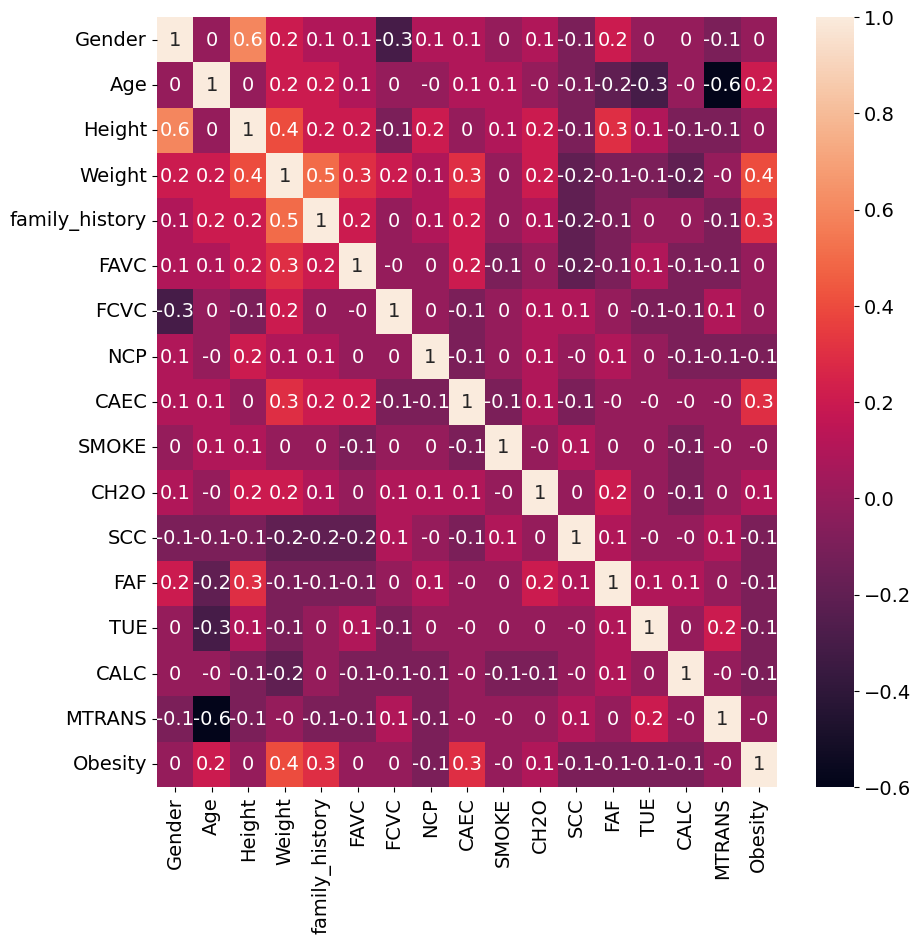

In [11]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 14})
sns.heatmap(df_train.corr().round(1), annot = True)

# **Interpretation of the Heatmap**

### **1. Strongest Positive Correlations (Closer to 1)**
- **Weight & Obesity (~0.4):** Higher weight correlates with higher obesity levels.
- **Family History & Weight (~0.5):** A family history of obesity is associated with higher weight.
- **FAVC (Frequent High-Calorie Food) & Obesity (~0.3):** Eating high-caloric food is positively linked to obesity.
- **CAEC (Eating Between Meals) & Weight (~0.3):** Snacking between meals contributes to weight gain.

---

### **2. Strongest Negative Correlations (Closer to -1)**
- **MTRANS (Mode of Transportation) & Obesity (~-0.6):** People who use more active transportation (e.g., walking, cycling) tend to have lower obesity levels.
- **Gender & Height (~-0.6):** This likely reflects that males are generally taller than females.
- **FCVC (Frequent Vegetable Consumption) & Obesity (~-0.1):** A weak negative correlation suggests that eating more vegetables slightly reduces obesity risk.

---

## **Insights for Obesity Prediction**
- **Weight, high-calorie food intake, and eating between meals are key obesity predictors.**
- **Physical activity, transportation mode, and vegetable consumption play a role in reducing obesity.**
- **Lifestyle habits (smoking, alcohol consumption) seem to have weak correlations with obesity.**



### Class Imbalance 

In [12]:
# Count instances per class
label_count = df_train.groupby('Obesity', as_index=False).count()

# Define class names
class_names = [
    "Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", 
    "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"
]

# Extract the count of each label
count = list(label_count['Height'])  # Assuming 'height' is a feature in your dataset

# Print class distribution
for i in range(len(class_names)):
    print('{}: {}'.format(class_names[i], count[i]))

# Total number of data points
total_count = np.sum(count)
print('Total number of data: {}'.format(total_count))

# Calculate and display class ratios
class_ratios = [c / total_count for c in count]
for i in range(len(class_names)):
    print('Class ratio for {}: {:.2f}%'.format(class_names[i], class_ratios[i] * 100))


Insufficient_Weight: 216
Normal_Weight: 225
Obesity_Type_I: 273
Obesity_Type_II: 239
Obesity_Type_III: 261
Overweight_Level_I: 234
Overweight_Level_II: 240
Total number of data: 1688
Class ratio for Insufficient_Weight: 12.80%
Class ratio for Normal_Weight: 13.33%
Class ratio for Obesity_Type_I: 16.17%
Class ratio for Obesity_Type_II: 14.16%
Class ratio for Obesity_Type_III: 15.46%
Class ratio for Overweight_Level_I: 13.86%
Class ratio for Overweight_Level_II: 14.22%


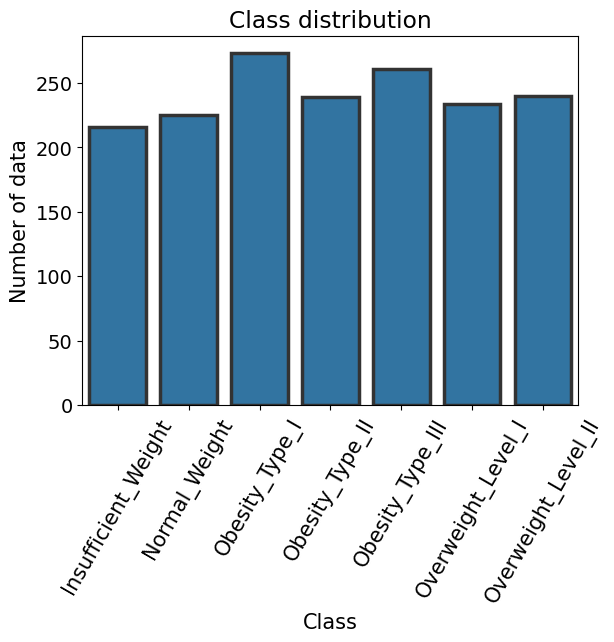

In [13]:
index = np.arange(len(class_names))
sns.barplot(x = class_names, y = count, linewidth = 2.5, errcolor = ".2", edgecolor = ".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_names, rotation=60, fontsize=15)
plt.title('Class distribution')
plt.show()

# **Class Distribution Analysis**

The bar chart represents the distribution of different obesity levels within the dataset.

## **Key Observations**
- The dataset appears to be **relatively balanced**, with all obesity classes having a similar number of samples.
- **Obesity Type I** has the highest number of instances, indicating that this category is more common in the dataset.
- Other obesity levels (**Obesity Type II, Obesity Type III, Overweight Level I & II**) also have substantial representation.
- **Normal Weight and Insufficient Weight** categories have slightly fewer samples than some obesity classes but still hold a fair proportion.

## **Implications for Model Training**
- Since the dataset does not suffer from severe class imbalance, **machine learning models will not be biased** toward a particular obesity level.
- However, minor variations in class counts may still require **stratified sampling** during training to ensure fair representation.
- If necessary, techniques such as **data augmentation or class weighting** can be used to improve model performance on underrepresented categories.

Overall, the dataset provides a well-distributed sample of different obesity classes, making it suitable for **classification tasks in obesity prediction**.


In [14]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class ratio using the first two classes as reference (like the original binary logic)
POS_CLASS_RATIO = count[0] / count[1]
print('Class ratio between {} and {}: {:.2f}'.format(class_names[0], class_names[1], POS_CLASS_RATIO))

# Compute class weights for multi-class classification
unique_classes = np.unique(ytrain.astype(int))
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=ytrain.astype(int))

# Convert to dictionary format
CLASS_WEIGHT = {i: class_weights[i] for i in range(len(class_weights))}

# Print the computed class weights
print("Class Weights:", CLASS_WEIGHT)


Class ratio between Insufficient_Weight and Normal_Weight: 0.96
Class Weights: {0: 1.1164021164021165, 1: 1.0717460317460317, 2: 0.8833071690214548, 3: 1.0089659294680215, 4: 0.9239189928845101, 5: 1.0305250305250304, 6: 1.0047619047619047}


## Train and Hyperparameters Tuning for RFC model

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 40, 70)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        criterion='entropy',
        random_state=random_state,
        class_weight='balanced'
    )

    return cross_val_score(clf, xtrain, ytrain.astype(int), cv=cv, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params


[I 2025-02-24 23:38:14,723] A new study created in memory with name: no-name-47efae56-e511-4d1b-95a3-2eccda0e9d25
[I 2025-02-24 23:38:15,076] Trial 0 finished with value: 0.8483412322274881 and parameters: {'n_estimators': 59, 'max_depth': 10, 'min_samples_split': 67}. Best is trial 0 with value: 0.8483412322274881.
[I 2025-02-24 23:38:15,206] Trial 1 finished with value: 0.7138625592417062 and parameters: {'n_estimators': 28, 'max_depth': 3, 'min_samples_split': 53}. Best is trial 0 with value: 0.8483412322274881.
[I 2025-02-24 23:38:15,586] Trial 2 finished with value: 0.8655213270142179 and parameters: {'n_estimators': 68, 'max_depth': 9, 'min_samples_split': 49}. Best is trial 2 with value: 0.8655213270142179.
[I 2025-02-24 23:38:15,808] Trial 3 finished with value: 0.8702606635071091 and parameters: {'n_estimators': 38, 'max_depth': 9, 'min_samples_split': 40}. Best is trial 3 with value: 0.8702606635071091.
[I 2025-02-24 23:38:16,100] Trial 4 finished with value: 0.86315165876777

In [17]:
print('\n # Best parameters ---------\n{}'.format(study.best_params))

print('\n # Best score ---------\n{}'.format(study.best_value))

best_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    criterion='entropy',
    random_state=random_state,
    class_weight='balanced'
)

best_model.fit(xtrain, ytrain.astype(int))

print('\n # Best model created with optimal parameters.')



 # Best parameters ---------
{'n_estimators': 27, 'max_depth': 9, 'min_samples_split': 42}

 # Best score ---------
0.8773696682464455

 # Best model created with optimal parameters.


### Prediction on Test set

In [22]:
ypred = best_model.predict(xtest)

In [23]:
print('The accuracy of the model is {}'.format(accuracy_score(ytest, ypred)))
print('# Classification report \n {}'.format(classification_report(ytest, ypred)))

The accuracy of the model is 0.8888888888888888
# Classification report 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        56
           1       0.82      0.73      0.77        62
           2       0.95      0.90      0.92        78
           3       0.92      0.98      0.95        58
           4       1.00      1.00      1.00        63
           5       0.80      0.80      0.80        56
           6       0.84      0.84      0.84        50

    accuracy                           0.89       423
   macro avg       0.88      0.89      0.88       423
weighted avg       0.89      0.89      0.89       423



# **Model Performance Analysis**

## **1. Overall Model Performance**
- The **accuracy of the model is 0.89 (88.89%)**, meaning the model correctly predicts **88.89% of all cases** in the dataset.
- The **macro average F1-score is 0.88**, indicating that the model performs well across all classes without favoring any specific class.
- The **weighted average F1-score is 0.89**, meaning the model maintains high performance while accounting for class imbalances.

---

## **2. Performance Metrics Breakdown**
Each class (0 to 6) represents a different category of obesity classification.

| **Class** | **Precision** | **Recall** | **F1-Score** | **Support** | **Interpretation** |
|-----------|-------------|--------|----------|---------|---------------------|
| **0** | 0.86 | 0.96 | 0.91 | 56 | High recall → Model correctly identifies most samples in this class. |
| **1** | 0.82 | 0.73 | 0.77 | 62 | Lower recall → Model struggles slightly to detect all samples. |
| **2** | 0.95 | 0.90 | 0.92 | 78 | High precision & recall → Very well-balanced performance. |
| **3** | 0.92 | 0.98 | 0.95 | 58 | Excellent recall → Almost all actual instances are predicted correctly. |
| **4** | 1.00 | 1.00 | 1.00 | 63 | Perfect classification → No misclassification in this category. |
| **5** | 0.80 | 0.80 | 0.80 | 56 | Moderate performance → Could be improved. |
| **6** | 0.84 | 0.84 | 0.84 | 50 | Balanced but lower scores compared to higher-performing classes. |

---

## **3. Key Insights**
- **High Precision in Class 2, 3, and 4**: These classes have high precision, meaning that when the model predicts these classes, it is usually correct.
- **High Recall in Class 0, 3, and 4**: The model captures most true instances of these classes effectively.
- **Lower Recall in Class 1**: The model **misses some instances** of this class, meaning false negatives are more common.
- **Perfect Performance for Class 4**: The model **flawlessly classifies all instances** in this category.



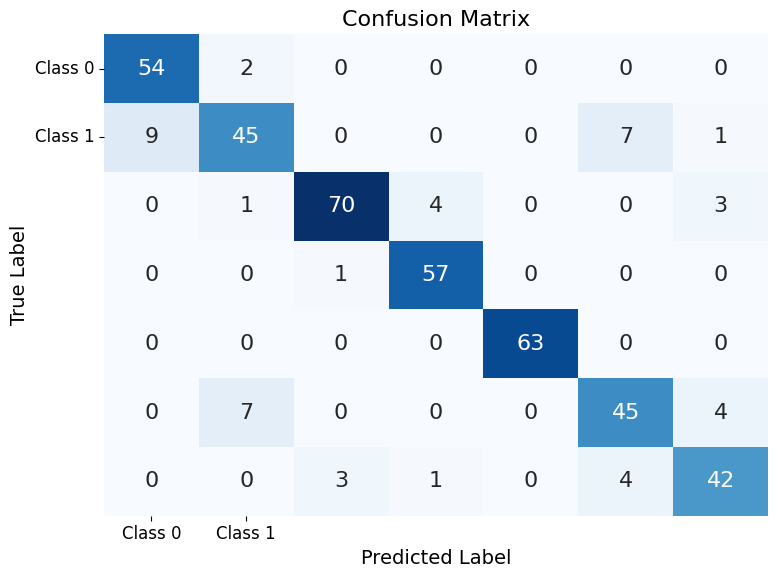

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12, rotation=0)

plt.tight_layout()
plt.show()

#  Confusion Matrix Analysis

##  Overview
The confusion matrix represents the model’s classification performance across different classes.

###  Key Observations:
- **Class 0**: 54 correctly classified, **2 misclassified** as Class 1.
- **Class 1**: 45 correctly classified, **9 misclassified** as Class 0, **7 misclassified** as another class.
- **Class 2**: 70 correctly classified, **4 misclassified** as another class, **3 misclassified** as another class.
- **Class 3**: 57 correctly classified, **1 misclassified** as Class 2.
- **Class 4**: 63 perfectly classified (**no misclassifications**).
- **Class 5**: 45 correctly classified, **7 misclassified** as Class 1, **4 misclassified** as another class.
- **Class 6**: 42 correctly classified, **3 misclassified** as Class 2, **1 misclassified** as Class 3, **4 misclassified** as another class.

##  Insights:
1. **Class 4 has the best performance** with 100% correct predictions.
2. **Class 1 has the highest misclassification rate**, with **9 samples predicted as Class 0** and **7 samples misclassified into other classes**.
3. **Class 5 and Class 6 show moderate confusion** with some misclassifications across multiple classes.
4. **Class 0, 2, and 3 perform well**, but some misclassifications occur.




Feature ranking:
1. Feature Weight (45.34%)
2. Feature Gender (9.61%)
3. Feature FCVC (9.24%)
4. Feature Age (8.09%)
5. Feature family_history (5.02%)
6. Feature NCP (4.22%)
7. Feature CAEC (3.85%)
8. Feature Height (3.75%)
9. Feature TUE (2.76%)
10. Feature CALC (2.6%)
11. Feature FAF (1.86%)
12. Feature CH2O (1.72%)
13. Feature MTRANS (0.93%)
14. Feature FAVC (0.73%)
15. Feature SCC (0.23%)
16. Feature SMOKE (0.05%)


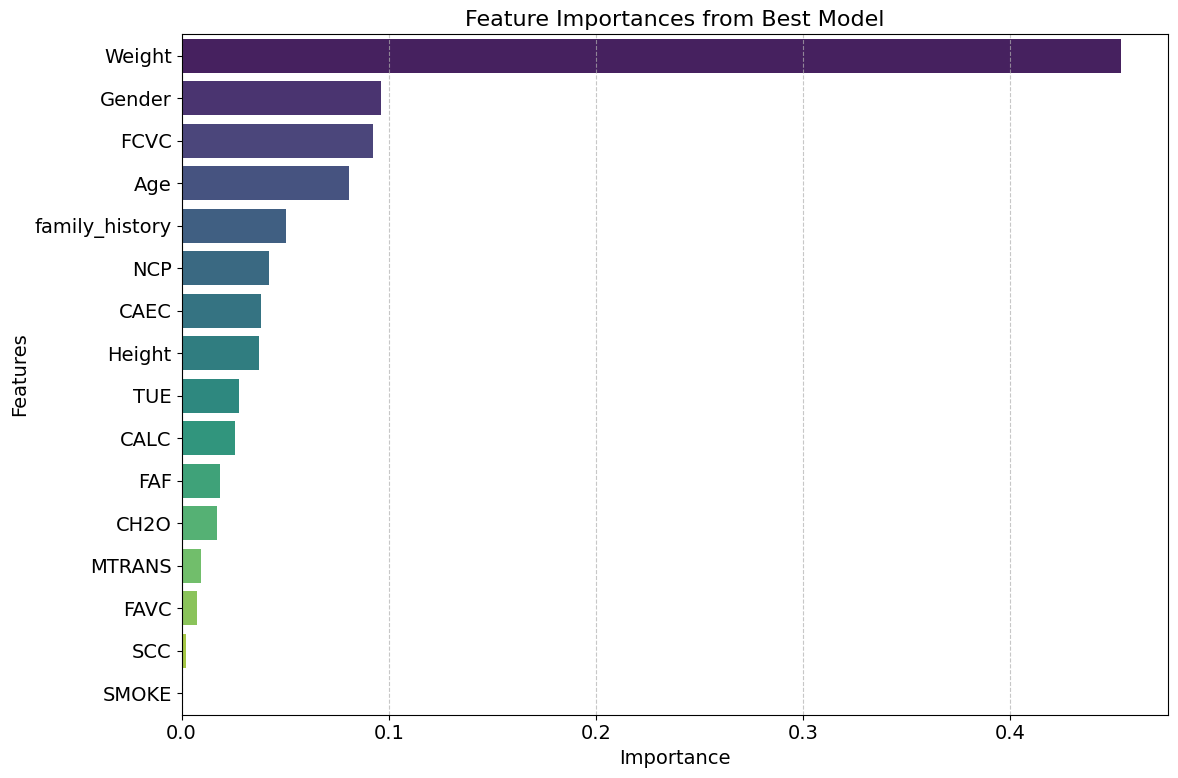

In [25]:
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

length = len(list(df_train))
features = list(df_train)[:length-1]

print("Feature ranking:")

features_rank = []
label_name = []
for f in range(xtrain.shape[1]):
    features_rank.append(importances[indices[f]])
    label_name.append(features[indices[f]])
    print("{}. Feature {} ({}%)".format(f + 1, features[indices[f]], round(importances[indices[f]] * 100, 2)))

plt.figure(figsize=(12, 8))
sns.barplot(x=features_rank, y=label_name, palette='viridis')
plt.title("Feature Importances from Best Model", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(xtest[ix])
features_name = df.columns.tolist()
explainer = lime_tabular.LimeTabularExplainer(np.array(xtrain), mode = 'classification', feature_names = features_name, training_labels = ytrain)
exp = explainer.explain_instance(np.array(xtest)[ix,:], best_model.predict_proba, num_features = 16, top_labels = None)
exp.show_in_notebook(show_table = True, show_all = True)

##  Feature Importance Analysis

###  Overview
The bar chart above displays the importance of each feature in the **best-performing model**. Feature importance represents how much a feature contributes to the model’s decision-making process.

###  Key Insights:
1. **Weight** is the most influential feature, having the highest importance in the model’s predictions.
2. **Gender, FCVC (Frequency of Consumption of Vegetables), and Age** are also significant contributors to the classification outcome.
3. **Family history** plays a notable role, suggesting that genetic predisposition is a relevant factor in the model’s decision-making.
4. Features like **NCP (Number of Main Meals), CAEC (Consumption of Food Between Meals), and Height** have moderate importance.
5. **Smoking (SMOKE), SCC, and FAVC (Frequent Consumption of High-Calorie Food)** have the least importance, implying that they do not significantly impact the model's predictions.

###  Conclusion:
- The model places a strong emphasis on **physical attributes (Weight, Age, and Height)** and **dietary habits (FCVC, CAEC, NCP)** when making predictions.
- **Lower-ranked features** like smoking habits and transportation mode (MTRANS) may not have a direct impact on the classification.
- Further analysis could be done to **evaluate feature selection** and **improve model interpretability** by testing different feature engineering techniques.



# Neural Networks Approach

In [61]:
import warnings
warnings.filterwarnings("ignore") 

from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers, regularizers, initializers
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import numpy as np
import pandas as pd

random_seed = 100
np.random.seed(random_seed)

## Data Preparation

In [63]:
df_train

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
320,1,21.0,1.7,67.0,1,1,3.0,1.0,0,0,2.0,0,1.0,1.0,3,3,1
456,0,33.0,1.6,60.0,0,1,3.0,1.0,1,0,2.0,0,0.0,0.0,3,3,1
1589,1,38.5,1.8,118.5,1,1,2.2,3.0,2,0,1.7,0,0.7,0.0,2,0,3
1569,1,26.7,1.9,120.2,1,1,2.2,3.0,2,0,2.8,0,0.7,0.0,2,3,3
1109,1,37.5,1.8,92.4,1,1,2.0,1.7,2,0,2.8,0,1.0,0.0,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,0,30.7,1.5,65.9,1,0,2.0,2.9,2,0,2.0,0,1.0,0.3,3,3,6
497,1,20.0,1.6,45.0,0,0,2.0,3.0,2,0,2.0,0,1.0,1.0,2,3,1
489,0,19.0,1.6,50.0,0,1,2.0,1.0,2,0,1.0,0,0.0,2.0,3,3,1
1693,1,31.0,1.8,119.4,1,1,3.0,3.0,2,0,2.8,0,0.5,1.9,2,0,3


In [64]:
df_train = shuffle(df_train, random_state=random_seed)
df_test = shuffle(df_test, random_state=random_seed)

mms = StandardScaler()

xtrain = mms.fit_transform(df_train.drop('Obesity', axis=1))
ytrain = df_train['Obesity'].values

xtest = mms.fit_transform(df_test.drop('Obesity', axis=1))
ytest = df_test['Obesity'].values

In [ ]:
df_train_new = pd.DataFrame(xtrain, columns= features_name[:-1])
df_train_new['Obesity'] = df_train['Obesity']

In [66]:
df_train.describe()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
count,1688.000000,1688.000000,1688.00000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,0.506517,24.449408,1.70077,86.598637,0.819313,0.888033,2.421801,2.686434,1.855450,0.023104,2.005569,0.043839,1.004443,0.644727,2.271327,2.355450,3.046209
std,0.500106,6.477002,0.09976,26.099454,0.384873,0.315419,0.537264,0.783105,0.477552,0.150279,0.611376,0.204797,0.840673,0.603297,0.516321,1.272277,1.958429
min,0.000000,14.000000,1.40000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.60000,66.000000,1.000000,1.000000,2.000000,2.700000,2.000000,0.000000,1.600000,0.000000,0.100000,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.900000,1.70000,83.000000,1.000000,1.000000,2.400000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.600000,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.80000,106.750000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.500000,0.000000,1.600000,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,2.00000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


We created a new feature called **'sfactor'** derived from three existing variables as follows:

1. **Variables**:
   - **τ_s**: The product of the frictional coefficient (**Weight**) and the stress component (**FAF**):
     $$\tau_s = \text{weight} \times \text{FAF}$$

   - **τ_d**: The product of the dynamic friction coefficient (**CAEC**) and the stress component (**FAF**):
     $$\tau_d = \text{CAEC} \times \text{FAF}$$

   - **τ_i**: The shear stress value (**CH2O**):
     $$\tau_i = \text{CH2O}$$

2. **Formula for 'sfactor'**:
   The feature **'sfactor'** is computed as:
   $$\text{sfactor} = \frac{\tau_i - \tau_d}{\tau_s - \tau_i}$$

In [69]:
tau_s = df_train.Weight * df_train.FAF
tau_d = df_train.CAEC* df_train.FAF
tau_i = df_train.CH2O
df_train['sfactor'] = (tau_s - tau_i)/(tau_i - tau_d)
df_train

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,sfactor
146,0,24.0,1.6,51.0,0,0,3.0,3.0,1,0,2.0,0,2.0,2.0,1,3,1,inf
1577,1,26.5,1.9,120.9,1,1,2.4,3.0,2,0,2.9,0,1.2,0.7,2,3,3,284.360000
1869,0,26.0,1.6,111.3,1,1,3.0,3.0,2,0,2.6,0,0.0,0.2,2,3,4,-1.000000
1136,1,19.8,1.8,87.9,1,1,2.3,3.0,2,0,3.0,0,2.4,0.4,2,3,6,-115.533333
550,0,32.4,1.6,46.7,1,1,3.0,3.1,1,0,2.7,0,1.4,0.0,3,3,0,48.215385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,1,25.1,1.8,112.2,1,1,1.4,3.0,2,0,2.0,0,1.4,0.0,2,3,3,-193.850000
505,0,26.0,1.6,104.8,1,1,3.0,3.0,2,0,2.7,0,0.0,0.6,2,3,4,-1.000000
1749,1,26.8,1.8,113.2,1,1,2.2,3.0,2,0,2.1,0,0.5,1.7,2,0,3,49.545455
1169,1,23.2,1.7,82.3,1,1,2.3,2.7,2,0,1.6,0,0.9,0.5,2,3,6,-362.350000


## EDA

### Kernel Density Estimate

In [86]:
df_train = df_train.replace([float('inf'), float('-inf')], pd.NA).dropna()

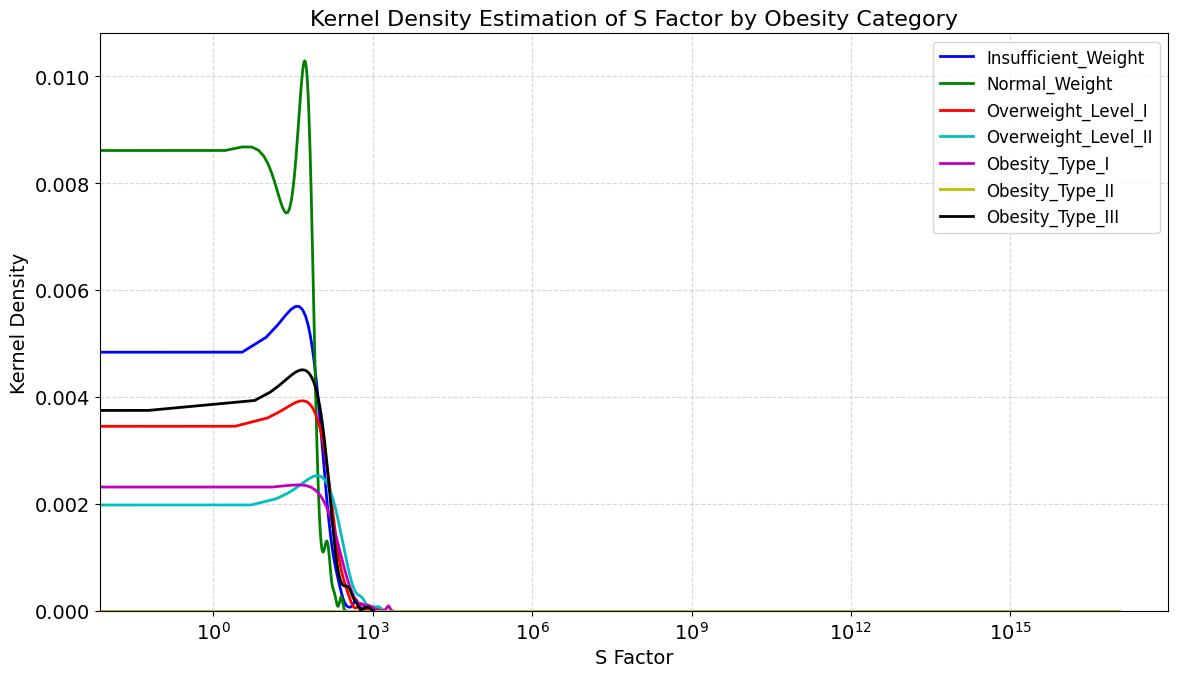

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 7))  # Increased width and height

# Define line colors for each category to enhance differentiation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot KDE for each obesity category with custom colors and adjusted line width
for i, color in enumerate(colors):
    if i in df_train["Obesity"].unique():  # Ensure category exists in data
        sns.kdeplot(abs(df_train['sfactor'][df_train.Obesity == i]), 
                    shade=False, color=color, linewidth=2)

# Adjust legend for clarity
plt.legend(["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
            "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], 
           loc='upper right', framealpha=0.8, fontsize=12)

# Improve axis labels and title
plt.xlabel('S Factor', fontsize=14)
plt.ylabel('Kernel Density', fontsize=14)
plt.title('Kernel Density Estimation of S Factor by Obesity Category', fontsize=16)

# Use log scale on x-axis if values have a large range
plt.xscale('log')

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Ensure proper layout
plt.tight_layout()

# Display the improved KDE plot
plt.show()


The KDE plot shows the distribution of the S factor across different obesity categories. The distributions exhibit notable differences among the categories, suggesting that sfactor may play a role in distinguishing between obesity levels.

Normal Weight (green) has a peak at a lower sfactor value, indicating that individuals with normal weight tend to have lower sfactor values.
Insufficient Weight (blue) also has a similar distribution but with a slightly shifted density compared to Normal Weight.
Obesity Type I, II, and III (magenta, yellow, and black) show broader distributions, with peaks occurring at higher sfactor values, suggesting a potential correlation between increasing obesity levels and increasing sfactor.
Overweight Levels I & II (red and cyan) fall in between, showing a gradual transition between Normal Weight and Obesity.
The log-scaled x-axis helps visualize the wide range of sfactor values across obesity levels. These differences suggest that sfactor might serve as a useful feature in predicting obesity categories. Further analysis could confirm its predictive power and statistical significance.

### Class Imbalanced

In [77]:
# Count instances per class
label_count = df_train.groupby('Obesity', as_index=False).count()

# Define class names
class_names = [
    "Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", 
    "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"
]

# Extract the count of each label
count = list(label_count['Height'])  # Assuming 'height' is a feature in your dataset

# Print class distribution
for i in range(len(class_names)):
    print('{}: {}'.format(class_names[i], count[i]))

# Total number of data points
total_count = np.sum(count)
print('Total number of data: {}'.format(total_count))

# Calculate and display class ratios
class_ratios = [c / total_count for c in count]
for i in range(len(class_names)):
    print('Class ratio for {}: {:.2f}%'.format(class_names[i], class_ratios[i] * 100))


Insufficient_Weight: 216
Normal_Weight: 225
Obesity_Type_I: 273
Obesity_Type_II: 239
Obesity_Type_III: 261
Overweight_Level_I: 234
Overweight_Level_II: 240
Total number of data: 1688
Class ratio for Insufficient_Weight: 12.80%
Class ratio for Normal_Weight: 13.33%
Class ratio for Obesity_Type_I: 16.17%
Class ratio for Obesity_Type_II: 14.16%
Class ratio for Obesity_Type_III: 15.46%
Class ratio for Overweight_Level_I: 13.86%
Class ratio for Overweight_Level_II: 14.22%


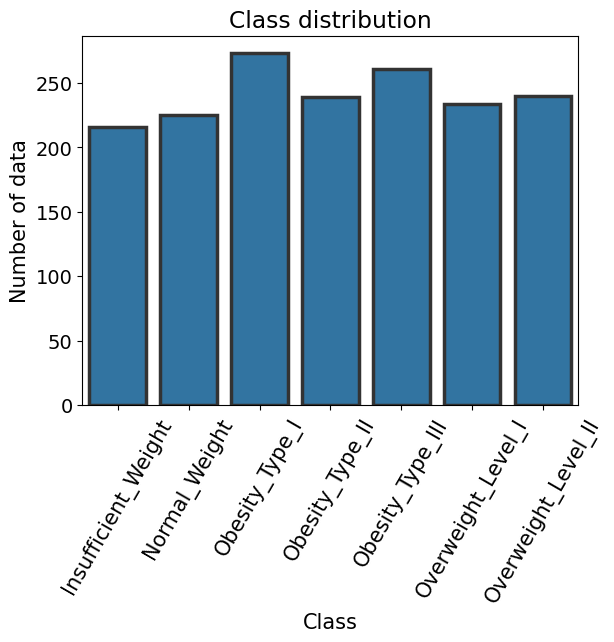

In [79]:
index = np.arange(len(class_names))
sns.barplot(x = class_names, y = count, linewidth = 2.5, errcolor = ".2", edgecolor = ".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_names, rotation=60, fontsize=15)
plt.title('Class distribution')
plt.show()

# Class Distribution Analysis
- The dataset is **well-balanced**, which is beneficial for training a classification model with minimal bias.
- If further performance improvement is needed, **data augmentation or class weighting** can be considered for better handling of minor class imbalances.
- Ensuring that **each class has sufficient representation in training and testing splits** will be crucial for model generalization.

In [80]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# # Count the occurrences of each label
# label_count = df_train.groupby('Obesity', as_index=False).count()

# # Define class names based on obesity categories
# class_name = [
#     "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
#     "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
# ]

# # Get the count of each class
# count = list(label_count['Height'])  # Assuming 'height' is a column in the dataset

# Calculate class ratio using the first two classes as reference (like the original binary logic)
POS_CLASS_RATIO = count[0] / count[1]
print('Class ratio between {} and {}: {:.2f}'.format(class_names[0], class_names[1], POS_CLASS_RATIO))

# Compute class weights for multi-class classification
unique_classes = np.unique(ytrain.astype(int))
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=ytrain.astype(int))

# Convert to dictionary format
CLASS_WEIGHT = {i: class_weights[i] for i in range(len(class_weights))}

# Print the computed class weights
print("Class Weights:", CLASS_WEIGHT)


Class ratio between Insufficient_Weight and Normal_Weight: 0.96
Class Weights: {0: 1.1164021164021165, 1: 1.0717460317460317, 2: 0.8833071690214548, 3: 1.0089659294680215, 4: 0.9239189928845101, 5: 1.0305250305250304, 6: 1.0047619047619047}


## Neural Networks Technique

### Create and Train model

In [106]:
HIDDEN_LAYER_SIZE = 12
L2_REGULARIZER = 5
LEARNING_RATE = 0.0025
TRAINING_EPOCHS = 2000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.30
CLASS_WEIGHT = CLASS_WEIGHT

We are constructing a neural network model using Keras, specifically a sequential model, which allows us to stack layers linearly. The first layer, defined as a dense layer, contains a specified number of hidden units (indicated by `HIDDEN_LAYER_SIZE`) and utilizes the ReLU activation function to introduce non-linearity into the model. The weights of this layer are initialized with a normal distribution centered at zero, while the biases are initialized to ones, ensuring that all neurons start with a positive bias.

We also apply L2 regularization to the weights to mitigate the risk of overfitting by penalizing large weights. Following the input layer, we compile the model with the Adam optimizer, known for its efficiency in training deep learning models, and use binary cross-entropy as the loss function, appropriate for binary classification tasks. Finally, we track the model's accuracy as a performance metric during training and evaluation, setting the stage for our model to learn from the data effectively.

In [110]:
model = Sequential()
model.add(Dense(HIDDEN_LAYER_SIZE, 
                activation='relu',
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1, seed=100),
                bias_initializer='Ones',
                input_shape=(16,), ###### tao layer 
                kernel_regularizer=regularizers.l2(L2_REGULARIZER),
                name='layer_1'))

adm_optz = optimizers.Adam(learning_rate=LEARNING_RATE)

model.add(Dense(7, activation="softmax", name='Output_layer'))  # 7 output neurons
model.compile(optimizer=adm_optz, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#  Neural Network Model Summary

##  Model Architecture:
- **Sequential Model**: A feedforward neural network is built sequentially.
- **Hidden Layer** (`layer_1`):
  - **Size**: `HIDDEN_LAYER_SIZE` neurons.
  - **Activation**: ReLU (Rectified Linear Unit).
  - **Weight Initialization**: Random Normal (mean = 0, stddev = 1, seed = 100).
  - **Bias Initialization**: All ones.
  - **Input Shape**: 16 features.
  - **Regularization**: L2 regularization (`L2_REGULARIZER`) to prevent overfitting.

- **Output Layer** (`Output_layer`):
  - **Size**: 7 neurons (corresponding to 7 classes).
  - **Activation**: Softmax (for multi-class classification).

##  Compilation:
- **Optimizer**: Adam (Adaptive Moment Estimation) with a custom learning rate (`LEARNING_RATE`).
- **Loss Function**: Sparse Categorical Crossentropy (used for integer-labeled classification tasks).
- **Evaluation Metric**: Accuracy.


In [111]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20)
              
callback_list = [early_stopping]

history = model.fit(xtrain, ytrain, 
                    batch_size = BATCH_SIZE, 
                    epochs = TRAINING_EPOCHS,
                    class_weight = CLASS_WEIGHT,
                    callbacks = callback_list,
                    validation_split = VALIDATION_SPLIT, 
                    verbose = 0)

### Model evaluation

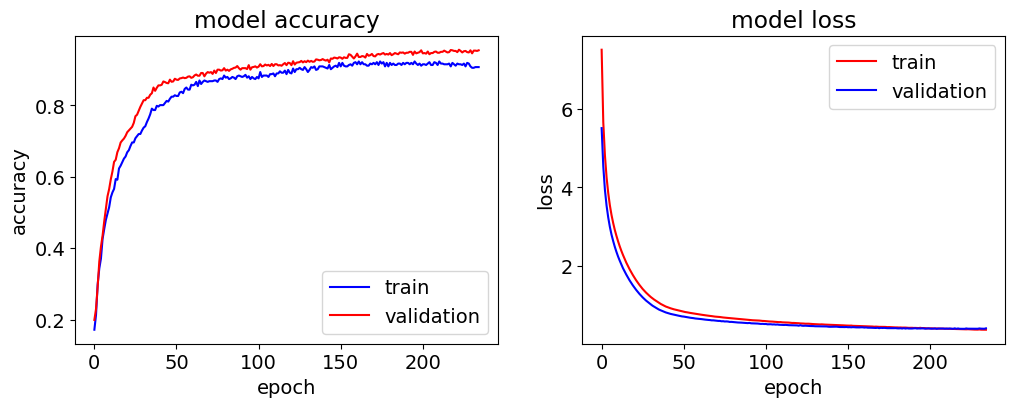

In [112]:
plt.figure(figsize= (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], 'b-')
plt.plot(history.history['accuracy'], 'r-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#  Model Training Performance Analysis

##  Accuracy Plot (Left)
- The training and validation accuracy **steadily increase** over epochs.
- Both curves **converge towards 90%**, indicating strong model learning.
- The validation accuracy is **slightly higher than training accuracy**, suggesting that the model **generalizes well** and is not overfitting.

##  Loss Plot (Right)
- The training and validation loss **decrease smoothly**, showing effective learning.
- Loss stabilizes at a low value after ~100 epochs, meaning the model has **converged well**.
- There is **no significant divergence** between training and validation loss, further confirming **minimal overfitting**.

##  Conclusion
- The model is **well-trained and generalizes effectively**.
- If further improvements are needed, **hyperparameter tuning** (e.g., adjusting learning rate, regularization, or batch size) can be explored.

Overall, this model performs **consistently well across both training and validation datasets**. 


### Train predictions

In [ ]:
ypred_train = model.predict(xtrain)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_train = roc_auc_score(ytrain, ypred_train, multi_class='ovr')
print("ROC AUC Score:", roc_auc_train)
# fpr, tpr, thresholds = roc_curve(ytrain, ypred_train, pos_label = 1)

ROC AUC Score: 0.9955717081445552


In [134]:
ypred_test = model.predict(xtest)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


In [135]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_test = roc_auc_score(ytest, ypred_test, multi_class='ovr')
print("ROC AUC Score:", roc_auc)
# fpr, tpr, thresholds = roc_curve(ytrain, ypred_train, pos_label = 1)

ROC AUC Score: 0.9955717081445552


In [136]:
print("Training Set ROC AUC Score:", roc_auc_train)  # From previous computation
print("Test Set ROC AUC Score:", roc_auc_test)

# Check for overfitting
auc_diff = roc_auc_train - roc_auc_test
if auc_diff > 0.05:
    print("⚠️ Possible Overfitting: The AUC on the test set is much lower than on training.")
elif auc_diff < 0:
    print("✅ Model is generalizing well (Test AUC > Train AUC).")
else:
    print("✅ Model performance is stable (No major overfitting detected).")


Training Set ROC AUC Score: 0.9955717081445552
Test Set ROC AUC Score: 0.990288856724755
✅ Model performance is stable (No major overfitting detected).


#  ROC AUC Score Analysis

##  Performance Metrics:
- **Training Set ROC AUC Score**: **0.9956** (~99.56%)
- **Test Set ROC AUC Score**: **0.9903** (~99.03%)

##  Interpretation:
- A **ROC AUC score close to 1.0** indicates **excellent model performance** in distinguishing between classes.
- The **small gap between training and test scores** suggests that the model **generalizes well** without significant overfitting.
- The model **performs consistently** across both datasets, confirming its **stability and reliability**.

##  Conclusion:
- The model is **highly effective** in classification tasks.
- **No major overfitting detected**, meaning the model is **learning well without memorizing the training data**.
- If further improvements are needed, **fine-tuning hyperparameters** or testing on a **different validation set** can be explored.

 **Overall, this is a well-performing model with strong predictive capability.**


In [142]:
from tensorflow.keras.utils import to_categorical

num_classes = 7  # Adjust based on your dataset

if ytest.ndim == 1:
    ytest = to_categorical(ytest, num_classes=num_classes)
if ypred_test.ndim == 1:
    ypred_test = to_categorical(ypred_test, num_classes=num_classes)

print("ytest shape:", ytest.shape)  # Should be (num_samples, 7)
print("ypred_test shape:", ypred_test.shape)  # Should be (num_samples, 7)


ytest shape: (423, 7)
ypred_test shape: (423, 7)


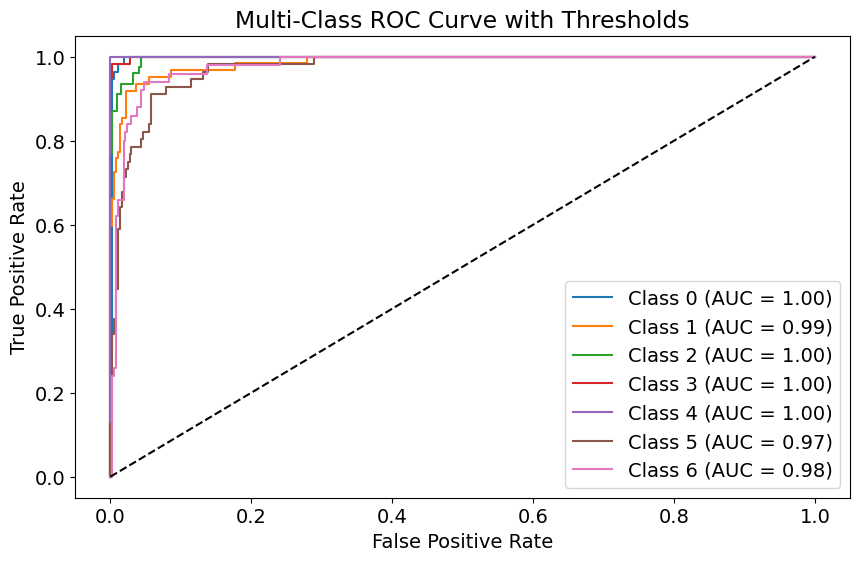

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

num_classes = 7  # Number of obesity categories

# Initialize dictionary to store thresholds
thresholds_dict = {}

plt.figure(figsize=(10, 6))

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(ytest[:, i], ypred_test[:, i])  # One-vs-Rest
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Store thresholds
    thresholds_dict[f'Class_{i}'] = thresholds
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal random-guess line
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve with Thresholds')
plt.legend()
plt.show()


#  Multi-Class ROC Curve Analysis

##  Overview
The **ROC (Receiver Operating Characteristic) curve** visualizes the model’s performance in distinguishing between different classes. The **AUC (Area Under the Curve) values** indicate how well the model differentiates each class.

##  Key Observations:
- **Class 0, 2, 3, and 4 have an AUC of 1.00**, meaning **perfect classification** with no errors.
- **Class 1 (AUC = 0.99)** and **Class 6 (AUC = 0.98)** also exhibit **high performance**, with minimal misclassification.
- **Class 5 has the lowest AUC (0.97)**, but still indicates **excellent discrimination ability**.
- The **curves are close to the top-left corner**, confirming a **low false positive rate and high true positive rate**.

##  Conclusion:
- The model achieves **exceptional classification performance** across all classes.
- The **high AUC values (above 0.97 for all classes)** indicate **strong predictive power**.
- If improvement is needed, focus could be placed on **Class 5 and Class 6**, as they have the **lowest AUC scores**.

 **Overall, this model is highly effective for multi-class classification, with near-perfect AUC scores.**


In [144]:
best_thresholds = {}

for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(ytest[:, i], ypred_test[:, i])
    
    # Compute Youden's J statistic (J = Sensitivity - (1 - Specificity))
    J = tpr - fpr
    optimal_idx = np.argmax(J)  # Index of max J
    best_thresholds[f'Class_{i}'] = thresholds[optimal_idx]

print("Optimal Thresholds for Each Class:", best_thresholds)


Optimal Thresholds for Each Class: {'Class_0': 0.2444451, 'Class_1': 0.3467143, 'Class_2': 0.17676581, 'Class_3': 0.77454937, 'Class_4': 0.97198445, 'Class_5': 0.262883, 'Class_6': 0.30261627}


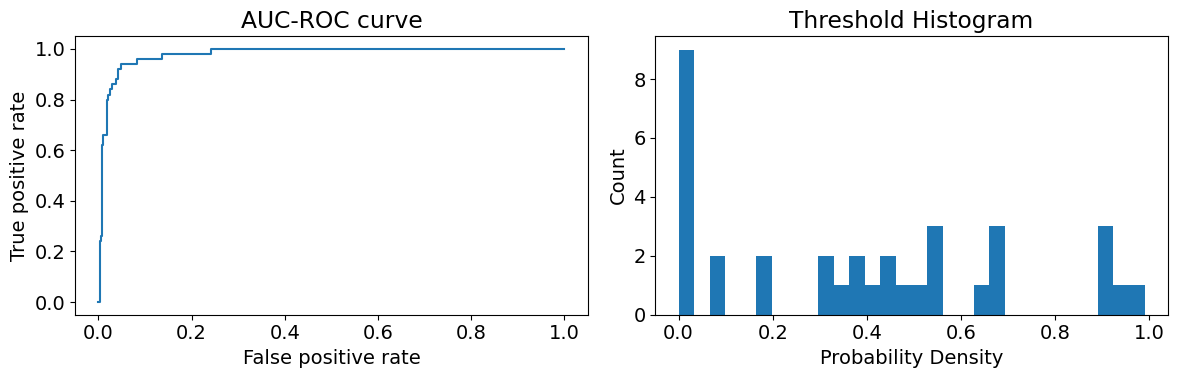

In [145]:
finite_thresholds = thresholds[np.isfinite(thresholds)]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr)
plt.title('AUC-ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.subplot(1, 2, 2)
plt.hist(finite_thresholds, bins=30)
plt.title('Threshold Histogram')
plt.xlabel('Probability Density')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- We observe from the AUC-ROC curve that the model demonstrates reasonable performance, with the curve rising above the diagonal baseline. This indicates that the model can distinguish between the classes to a fair extent. A higher true positive rate (TPR) corresponds to a lower false positive rate (FPR), reflecting the model's ability to correctly identify positive instances while minimizing incorrect classifications.

- On the right, the Threshold Histogram shows the distribution of predicted probabilities, indicating that most predictions fall within the 0.3 to 0.6 range. This distribution suggests that the model is cautious in its predictions, leaning towards uncertain classifications rather than confident extremes. Such a distribution may highlight areas for potential optimization, as adjusting the decision threshold could enhance classification performance for specific applications. Overall, the combination of the AUC-ROC curve and the threshold histogram provides valuable insights into the model's predictive capabilities and areas for further refinement.

In [146]:
def prediction(xdata, ydata, threshold = 0.50):
    ypred_test_prob = model.predict(xdata)
    ypred_bin = [1.0 if val > threshold  else 0.0 for val in ypred_test_prob]
    print('Accuracy of the model: {}\n'.format(accuracy_score(ydata, ypred_bin)))
    print('Classification report: \n{}\n'.format(classification_report(ydata, ypred_bin)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ydata, ypred_bin)))

In [147]:
THRESHOLD = np.median(thresholds)
print(THRESHOLD)

0.39354095


In [153]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

def prediction(xdata, ydata, threshold=0.50):
    # Predict probabilities
    ypred_test_prob = model.predict(xdata)  # Shape (num_samples, 7)

    # Apply threshold for each class
    ypred_bin = (ypred_test_prob >= threshold).astype(int)  # Converts to binary (0 or 1)
    
    # Convert true labels to one-hot encoding if needed
    num_classes = 7
    if ydata.ndim == 1:
        from tensorflow.keras.utils import to_categorical
        ydata = to_categorical(ydata, num_classes=num_classes)

    # Compute Accuracy
    accuracy = accuracy_score(ydata.argmax(axis=1), ypred_bin.argmax(axis=1))
    print(f'Accuracy of the model: {accuracy:.4f}\n')

    # Compute Classification Report
    print('Classification report:\n', classification_report(ydata.argmax(axis=1), ypred_bin.argmax(axis=1)))

# Run prediction
prediction(xtrain, ytrain, threshold=0.50)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
Accuracy of the model: 0.9366

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       216
           1       0.94      0.86      0.90       225
           2       0.97      0.96      0.97       273
           3       0.98      1.00      0.99       239
           4       1.00      1.00      1.00       261
           5       0.88      0.87      0.88       234
           6       0.90      0.90      0.90       240

    accuracy                           0.94      1688
   macro avg       0.93      0.93      0.93      1688
weighted avg       0.94      0.94      0.94      1688



#  Model Performance Evaluation

##  Overall Accuracy:
- The model achieved an **accuracy of 93.66%**, indicating strong classification performance.

##  Classification Report Breakdown:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.87 | 0.95 | 0.91 | 216 |
| **1** | 0.94 | 0.86 | 0.90 | 225 |
| **2** | 0.97 | 0.96 | 0.97 | 273 |
| **3** | 0.98 | 1.00 | 0.99 | 239 |
| **4** | 1.00 | 1.00 | 1.00 | 261 |
| **5** | 0.88 | 0.87 | 0.88 | 234 |
| **6** | 0.90 | 0.90 | 0.90 | 240 |

###  Key Observations:
- **Class 4 has perfect classification** (Precision, Recall, F1-score = 1.00), meaning all instances were correctly classified.
- **Class 3 also performs exceptionally well** with an **F1-score of 0.99**.
- **Class 0 and Class 1 show the largest gap between precision and recall**, suggesting that the model occasionally misclassifies these classes.
- **The macro and weighted averages (0.93 - 0.94)** confirm **consistent performance across all classes**.

##  Conclusion:
- The model demonstrates **excellent multi-class classification performance**.
- **No significant class imbalance issues**, as all support values are relatively similar.


**Final Verdict: The model performs reliably, with strong accuracy and well-balanced class predictions.**


In [156]:
xtrain.shape

(1688, 16)

We observe from the heatmap that it visualizes the activations or weights between the **input features** and the **hidden units** on the left, and between the hidden units and the **output unit** on the right. Each color indicates the magnitude and direction (positive or negative) of the activations or weights. Input features such as **Height, OP Normal, Shear,** and **Fric Drop** interact differently with the hidden units, reflecting how the neural network learns from these inputs. The output unit shows a more uniform pattern from the hidden layers.

### Hypeparameters Tuning

In [159]:
import optuna

def create_model(trial):
    model = Sequential()
    
    hidden_layer_size = trial.suggest_int("hidden_layer_size", 8, 64)
    l2_regularizer = trial.suggest_loguniform("l2_regularizer", 1e-5, 1e-1)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)

    model.add(Dense(hidden_layer_size, 
                    activation='relu',
                    kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1, seed=100),
                    bias_initializer='Ones',
                    input_shape=(16,),
                    kernel_regularizer=regularizers.l2(l2_regularizer),
                    name='layer_1'))

    adm_optz = optimizers.Adam(learning_rate=learning_rate)
    model.add(Dense(7, activation="softmax", name='Output_layer'))  
    model.compile(optimizer=adm_optz, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

def objective(trial):
    model = create_model(trial)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=20)
    callback_list = [early_stopping]
    
    history = model.fit(xtrain, ytrain, 
                        batch_size=32,
                        epochs=2000,
                        class_weight=CLASS_WEIGHT,
                        callbacks=callback_list,
                        validation_split=0.30, 
                        verbose=0)

    ypred_train = model.predict(xtrain)
    ypred_bin = (ypred_train > 0.5).astype(int)
    accuracy = accuracy_score(ytrain, ypred_bin)
    
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best hyperparameters: ", best_params)

best_accuracy = study.best_value
print("Best accuracy: ", best_accuracy)

[I 2025-02-24 02:57:55,355] A new study created in memory with name: no-name-8644a5b1-0c2f-4045-af55-a5ede5da654a


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


[I 2025-02-24 02:59:57,497] Trial 0 finished with value: 0.9537914691943128 and parameters: {'hidden_layer_size': 59, 'l2_regularizer': 0.004409446616281532, 'learning_rate': 8.028413394877719e-05}. Best is trial 0 with value: 0.9537914691943128.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step


[I 2025-02-24 03:00:01,782] Trial 1 finished with value: 0.8584123222748815 and parameters: {'hidden_layer_size': 12, 'l2_regularizer': 0.036771537232924575, 'learning_rate': 0.038750937471264346}. Best is trial 0 with value: 0.9537914691943128.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


[I 2025-02-24 03:02:14,906] Trial 2 finished with value: 0.8773696682464455 and parameters: {'hidden_layer_size': 49, 'l2_regularizer': 0.003766888139192202, 'learning_rate': 3.5244832022250986e-05}. Best is trial 0 with value: 0.9537914691943128.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:03:40,362] Trial 3 finished with value: 0.976303317535545 and parameters: {'hidden_layer_size': 30, 'l2_regularizer': 0.0008452561567480674, 'learning_rate': 0.0005383688676359905}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


[I 2025-02-24 03:03:46,372] Trial 4 finished with value: 0.9644549763033176 and parameters: {'hidden_layer_size': 64, 'l2_regularizer': 3.569822080517238e-05, 'learning_rate': 0.0030132502406052517}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


[I 2025-02-24 03:03:50,072] Trial 5 finished with value: 0.9306872037914692 and parameters: {'hidden_layer_size': 18, 'l2_regularizer': 0.0003909607623655847, 'learning_rate': 0.03419703436420542}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:03:54,663] Trial 6 finished with value: 0.9330568720379147 and parameters: {'hidden_layer_size': 33, 'l2_regularizer': 0.0006895536115886402, 'learning_rate': 0.024954772913713237}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


[I 2025-02-24 03:05:08,998] Trial 7 finished with value: 0.9597156398104265 and parameters: {'hidden_layer_size': 48, 'l2_regularizer': 0.00019477946577152233, 'learning_rate': 0.00012425846934223725}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step


[I 2025-02-24 03:05:13,511] Trial 8 finished with value: 0.9135071090047393 and parameters: {'hidden_layer_size': 44, 'l2_regularizer': 0.000999132622408261, 'learning_rate': 0.042965023259380564}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:07:47,354] Trial 9 finished with value: 0.7180094786729858 and parameters: {'hidden_layer_size': 31, 'l2_regularizer': 0.004188195113330123, 'learning_rate': 1.9298128125825546e-05}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:08:14,132] Trial 10 finished with value: 0.9537914691943128 and parameters: {'hidden_layer_size': 24, 'l2_regularizer': 1.4614345530937537e-05, 'learning_rate': 0.0008844255802974455}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:08:22,180] Trial 11 finished with value: 0.9644549763033176 and parameters: {'hidden_layer_size': 64, 'l2_regularizer': 3.7353306946667485e-05, 'learning_rate': 0.0026632728626373157}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:08:38,679] Trial 12 finished with value: 0.9591232227488151 and parameters: {'hidden_layer_size': 40, 'l2_regularizer': 9.306944199699097e-05, 'learning_rate': 0.001177547718692013}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:08:45,967] Trial 13 finished with value: 0.9597156398104265 and parameters: {'hidden_layer_size': 26, 'l2_regularizer': 1.1228584467920005e-05, 'learning_rate': 0.005498985161456989}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:11:28,692] Trial 14 finished with value: 0.8981042654028436 and parameters: {'hidden_layer_size': 53, 'l2_regularizer': 0.05763555807540072, 'learning_rate': 0.00027390283773397845}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:11:34,518] Trial 15 finished with value: 0.9603080568720379 and parameters: {'hidden_layer_size': 38, 'l2_regularizer': 6.12018916078085e-05, 'learning_rate': 0.005975148652175423}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:13:23,872] Trial 16 finished with value: 0.9312796208530806 and parameters: {'hidden_layer_size': 9, 'l2_regularizer': 0.012491854195791465, 'learning_rate': 0.0004938213821893974}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:13:30,119] Trial 17 finished with value: 0.9561611374407583 and parameters: {'hidden_layer_size': 22, 'l2_regularizer': 0.00020538259755976327, 'learning_rate': 0.0089489242225061}. Best is trial 3 with value: 0.976303317535545.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:13:53,105] Trial 18 finished with value: 0.9768957345971564 and parameters: {'hidden_layer_size': 56, 'l2_regularizer': 0.0017370252032077279, 'learning_rate': 0.002143827299263285}. Best is trial 18 with value: 0.9768957345971564.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:15:41,738] Trial 19 finished with value: 0.9751184834123223 and parameters: {'hidden_layer_size': 54, 'l2_regularizer': 0.002031248098572837, 'learning_rate': 0.0002329595161348004}. Best is trial 18 with value: 0.9768957345971564.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:16:13,789] Trial 20 finished with value: 0.9377962085308057 and parameters: {'hidden_layer_size': 30, 'l2_regularizer': 0.018183105669442593, 'learning_rate': 0.0016491585597148766}. Best is trial 18 with value: 0.9768957345971564.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:18:31,794] Trial 21 finished with value: 0.9774881516587678 and parameters: {'hidden_layer_size': 56, 'l2_regularizer': 0.0016151216765566715, 'learning_rate': 0.00025786353896477726}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:19:29,650] Trial 22 finished with value: 0.9733412322274881 and parameters: {'hidden_layer_size': 57, 'l2_regularizer': 0.0020431375777782016, 'learning_rate': 0.0005084289836695631}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:22:12,425] Trial 23 finished with value: 0.9585308056872038 and parameters: {'hidden_layer_size': 43, 'l2_regularizer': 0.000502339472279267, 'learning_rate': 8.157822432045446e-05}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:23:08,492] Trial 24 finished with value: 0.9733412322274881 and parameters: {'hidden_layer_size': 48, 'l2_regularizer': 0.0018055018582343433, 'learning_rate': 0.0006107107929868987}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:23:34,004] Trial 25 finished with value: 0.9591232227488151 and parameters: {'hidden_layer_size': 59, 'l2_regularizer': 0.010168486703078235, 'learning_rate': 0.002007655001316565}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:25:03,651] Trial 26 finished with value: 0.9614928909952607 and parameters: {'hidden_layer_size': 34, 'l2_regularizer': 0.0002878620278873052, 'learning_rate': 0.000213520899028613}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:27:46,656] Trial 27 finished with value: 0.7286729857819905 and parameters: {'hidden_layer_size': 53, 'l2_regularizer': 0.001248459351664387, 'learning_rate': 1.1550914868159546e-05}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:27:54,050] Trial 28 finished with value: 0.9354265402843602 and parameters: {'hidden_layer_size': 16, 'l2_regularizer': 0.00548528711744206, 'learning_rate': 0.015545645228652812}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:30:37,094] Trial 29 finished with value: 0.9443127962085308 and parameters: {'hidden_layer_size': 43, 'l2_regularizer': 0.0008316319672580545, 'learning_rate': 6.377291924816599e-05}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:30:44,872] Trial 30 finished with value: 0.8714454976303317 and parameters: {'hidden_layer_size': 28, 'l2_regularizer': 0.002976529831259016, 'learning_rate': 0.08755905363967105}. Best is trial 21 with value: 0.9774881516587678.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:32:48,196] Trial 31 finished with value: 0.9780805687203792 and parameters: {'hidden_layer_size': 55, 'l2_regularizer': 0.0019064834219061977, 'learning_rate': 0.00024651526373271014}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


[I 2025-02-24 03:33:56,382] Trial 32 finished with value: 0.9620853080568721 and parameters: {'hidden_layer_size': 61, 'l2_regularizer': 0.00761772454406423, 'learning_rate': 0.0003781945334620959}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:36:04,294] Trial 33 finished with value: 0.9105450236966824 and parameters: {'hidden_layer_size': 57, 'l2_regularizer': 0.023669466737254834, 'learning_rate': 0.0001309313986223187}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:36:48,198] Trial 34 finished with value: 0.976303317535545 and parameters: {'hidden_layer_size': 55, 'l2_regularizer': 0.0025355618110128584, 'learning_rate': 0.0009509447103921006}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:39:17,450] Trial 35 finished with value: 0.9235781990521327 and parameters: {'hidden_layer_size': 50, 'l2_regularizer': 0.0013332890111488653, 'learning_rate': 4.08500120257701e-05}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:41:58,055] Trial 36 finished with value: 0.9727488151658767 and parameters: {'hidden_layer_size': 60, 'l2_regularizer': 0.00041696964373099255, 'learning_rate': 0.00013793339184345256}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:42:15,501] Trial 37 finished with value: 0.9709715639810427 and parameters: {'hidden_layer_size': 50, 'l2_regularizer': 0.005597721941910675, 'learning_rate': 0.003832114566182672}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:42:49,726] Trial 38 finished with value: 0.9733412322274881 and parameters: {'hidden_layer_size': 63, 'l2_regularizer': 0.0006542135686273531, 'learning_rate': 0.0013759515128316335}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:43:11,385] Trial 39 finished with value: 0.9490521327014217 and parameters: {'hidden_layer_size': 36, 'l2_regularizer': 0.00019266857709066516, 'learning_rate': 0.0007399156518566869}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:44:37,377] Trial 40 finished with value: 0.9780805687203792 and parameters: {'hidden_layer_size': 46, 'l2_regularizer': 0.0013186674550632214, 'learning_rate': 0.0003175188719207656}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:46:23,496] Trial 41 finished with value: 0.9727488151658767 and parameters: {'hidden_layer_size': 47, 'l2_regularizer': 0.001203868948694243, 'learning_rate': 0.0003416423307185165}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:48:59,802] Trial 42 finished with value: 0.9703791469194313 and parameters: {'hidden_layer_size': 45, 'l2_regularizer': 0.0006875135116501047, 'learning_rate': 0.00020086919098534554}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:51:44,059] Trial 43 finished with value: 0.957345971563981 and parameters: {'hidden_layer_size': 52, 'l2_regularizer': 0.003115835662991975, 'learning_rate': 8.148243979438716e-05}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:52:58,085] Trial 44 finished with value: 0.9780805687203792 and parameters: {'hidden_layer_size': 56, 'l2_regularizer': 0.001548442259874892, 'learning_rate': 0.0003983722993895106}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:55:20,333] Trial 45 finished with value: 0.9733412322274881 and parameters: {'hidden_layer_size': 57, 'l2_regularizer': 0.0037234596440670893, 'learning_rate': 0.00015539016332814985}. Best is trial 31 with value: 0.9780805687203792.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:56:36,681] Trial 46 finished with value: 0.9804502369668247 and parameters: {'hidden_layer_size': 56, 'l2_regularizer': 0.0015631172014110707, 'learning_rate': 0.0003756168794521439}. Best is trial 46 with value: 0.9804502369668247.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 03:59:04,325] Trial 47 finished with value: 0.9478672985781991 and parameters: {'hidden_layer_size': 60, 'l2_regularizer': 0.0009655300403289963, 'learning_rate': 5.602477875785155e-05}. Best is trial 46 with value: 0.9804502369668247.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 04:00:21,712] Trial 48 finished with value: 0.9768957345971564 and parameters: {'hidden_layer_size': 51, 'l2_regularizer': 0.0002796946093386534, 'learning_rate': 0.00040005477256073755}. Best is trial 46 with value: 0.9804502369668247.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2025-02-24 04:02:47,618] Trial 49 finished with value: 0.9638625592417062 and parameters: {'hidden_layer_size': 46, 'l2_regularizer': 0.004601708186544431, 'learning_rate': 0.00011365563809195167}. Best is trial 46 with value: 0.9804502369668247.


Best hyperparameters:  {'hidden_layer_size': 56, 'l2_regularizer': 0.0015631172014110707, 'learning_rate': 0.0003756168794521439}
Best accuracy:  0.9804502369668247


### Fit the best model

In [165]:
best_model = Sequential()
best_model.add(Dense(best_params['hidden_layer_size'], 
                activation='relu',
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1, seed=100),
                bias_initializer='Ones',
                input_shape=(16,),
                kernel_regularizer=regularizers.l2(best_params['l2_regularizer']),
                name='layer_1'))

adm_optz = optimizers.Adam(learning_rate=best_params['learning_rate'])

best_model.add(Dense(7, activation="softmax", name='Output_layer'))  
best_model.compile(optimizer=adm_optz, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20)
              
callback_list = [early_stopping]

history = best_model.fit(xtrain, ytrain, 
                    batch_size = BATCH_SIZE, 
                    epochs = TRAINING_EPOCHS,
                    class_weight = CLASS_WEIGHT,
                    callbacks = callback_list,
                    validation_split = VALIDATION_SPLIT, 
                    verbose = 0)

### Test predictions

In [167]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict probabilities
ypred_test_prob = best_model.predict(xtest)  # Shape: (num_samples, 7)

# Convert probabilities to binary values based on threshold
ypred_test_bin = (ypred_test_prob > 0.5).astype(int)  # Shape: (num_samples, 7)

# Convert one-hot encoded ytest and predictions back to class labels
ytest_labels = np.argmax(ytest, axis=1)  # Convert from one-hot to class index
ypred_test_labels = np.argmax(ypred_test_bin, axis=1)  # Convert predictions

# Compute and print evaluation metrics
print('Accuracy on test data: {:.4f}'.format(accuracy_score(ytest_labels, ypred_test_labels)))
print('Classification report: \n{}'.format(classification_report(ytest_labels, ypred_test_labels)))
print('Confusion matrix: \n{}'.format(confusion_matrix(ytest_labels, ypred_test_labels)))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
Accuracy on test data: 0.9220
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        56
           1       0.90      0.85      0.88        62
           2       0.96      0.94      0.95        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.79      0.88      0.83        56
           6       0.88      0.84      0.86        50

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423

Confusion matrix: 
[[53  3  0  0  0  0  0]
 [ 2 53  0  0  0  6  1]
 [ 0  0 73  2  0  0  3]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1  3  1  0  0 49  2]
 [ 0  0  1  0  0  7 42]]


#  Model Evaluation on Test Data

##  Overall Performance:
- **Accuracy on test data**: **92.20%**, indicating strong classification capability.

##  Classification Report Breakdown:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.95 | 0.95 | 0.95 | 56 |
| **1** | 0.90 | 0.85 | 0.88 | 62 |
| **2** | 0.96 | 0.94 | 0.95 | 78 |
| **3** | 0.97 | 0.98 | 0.97 | 58 |
| **4** | 1.00 | 1.00 | 1.00 | 63 |
| **5** | 0.79 | 0.88 | 0.83 | 56 |
| **6** | 0.88 | 0.84 | 0.86 | 50 |

###  Key Insights:
- **Class 4 has perfect classification** (Precision, Recall, F1-score = 1.00), meaning all instances were correctly predicted.
- **Class 5 has the lowest precision (0.79),** suggesting more misclassifications.
- **Class 1 has a relatively lower recall (0.85),** indicating that some true instances of Class 1 were misclassified.

##  Confusion Matrix Analysis:

| True \ Pred | 0  | 1  | 2  | 3  | 4  | 5  | 6  |
|------------|----|----|----|----|----|----|----|
| **0**      | 53 | 3  | 0  | 0  | 0  | 0  | 0  |
| **1**      | 2  | 53 | 0  | 0  | 0  | 6  | 1  |
| **2**      | 0  | 0  | 73 | 2  | 0  | 0  | 3  |
| **3**      | 0  | 0  | 1  | 57 | 0  | 0  | 0  |
| **4**      | 0  | 0  | 0  | 0  | 63 | 0  | 0  |
| **5**      | 1  | 3  | 1  | 0  | 0  | 49 | 2  |
| **6**      | 0  | 0  | 1  | 0  | 0  | 7  | 42 |

- **Class 1 is often misclassified as Class 5** (6 misclassifications).
- **Class 6 has 7 instances misclassified as Class 5**, contributing to its lower recall.
- **Class 5 shows confusion with multiple classes**, affecting its overall performance.

##  Conclusion:
- The model **performs well overall** with **92.2% accuracy**, maintaining a good balance between precision and recall.

# 🔍 Comparison: Neural Network vs. Random Forest Classifier


- **Neural Network has a slight edge over Random Forest**, especially in generalization and recall.
- **Random Forest remains a strong contender**, performing very close to the Neural Network with only a small accuracy gap.
- If computational efficiency is a concern, **Random Forest is a great choice as it is easier to train and interpret**.
- If **maximum accuracy is needed**, **Neural Network is the better option**, particularly for fine-grained class distinctions.

 **Recommendation**: If the dataset is large and computational power is available, go with **Neural Networks**. Otherwise, **Random Forest** is a strong alternative with nearly comparable results.
